In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/train.csv')
print(df.shape)
print(df.dtypes)
print(df.head())


(14999, 9)
vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object
       vidid  adview    views likes  ... comment   published duration category
0  VID_18655      40  1031602  8523  ...    1095  14-09-2016  PT7M37S        F
1  VID_14135       2     1707    56  ...       6  01-10-2016  PT9M30S        D
2   VID_2187       1     2023    25  ...       2  02-07-2016  PT2M16S        C
3  VID_23096       6   620860   777  ...     153  27-07-2016  PT4M22S        H
4  VID_10175       1      666     1  ...       0  29-06-2016    PT31S        D

[5 rows x 9 columns]


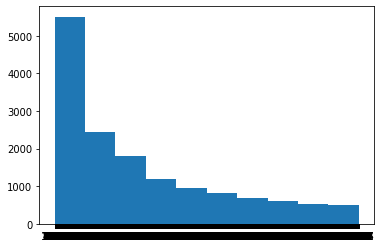

In [ ]:
plt.hist(df['likes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


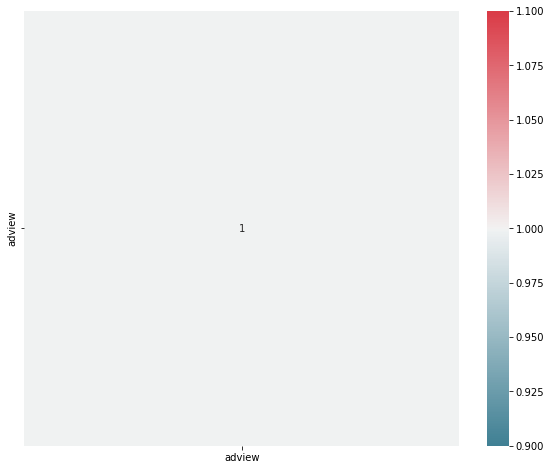

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr=df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10,as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
print(df[df['views']=='F'].index.values)

[7447 8112]


In [ ]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']
df


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,18-05-2015,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,20-10-2015,PT3M56S,D
14996,VID_805,4,3479,16,1,1,23-08-2013,PT3M13S,B
14997,VID_19843,1,963,0,0,0,02-10-2010,PT26S,G


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df["category"]=df["category"].map(category)
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
df["views"] = pd.to_numeric(df["views"])
df["comment"] = pd.to_numeric(df["comment"])
df["likes"] = pd.to_numeric(df["likes"])
df["dislikes"] = pd.to_numeric(df["dislikes"])
df["adview"]=pd.to_numeric(df["adview"])
column_vidid=df['vidid']
df

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,18-05-2015,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,20-10-2015,PT3M56S,4
14996,VID_805,4,3479,16,1,1,23-08-2013,PT3M13S,2
14997,VID_19843,1,963,0,0,0,02-10-2010,PT26S,7


In [ ]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['duration']=LabelEncoder().fit_transform(df['duration'])

df['published']=LabelEncoder().fit_transform(df['published'])
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,2925,6
1,2741,2,1707,56,2,6,64,3040,4
2,8138,1,2023,25,0,2,122,1863,3
3,9005,6,620860,777,161,153,2088,2546,8
4,122,1,666,1,0,0,2233,1963,4


In [ ]:
df['duration'].max()

3077

In [ ]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv('/content/train.csv')
mp = pd.read_csv('/content/train.csv')["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
df["duration"]=time1
df.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9005,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


In [ ]:
# Split Data
Y_train = pd.DataFrame(data = df.iloc[:, 1].values, columns = ['target'])
df=df.drop(["adview"],axis=1)
df=df.drop(["vidid"],axis=1)
df.head()
print(Y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

       target
0          40
1           2
2           1
3           6
4           1
...       ...
14632       2
14633       1
14634       4
14635       1
14636       1

[14637 rows x 1 columns]


0.15380107118270742

In [ ]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,supportvector_regressor )

Mean Absolute Error: 5058.758073793538
Mean Squared Error: 10890904457.48204
Root Mean Squared Error: 104359.49624965637


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3478.0606682452863
Mean Squared Error: 10901272137.274302
Root Mean Squared Error: 104409.15734395284


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 9087.045423497268
Mean Squared Error: 15750145100.953894
Root Mean Squared Error: 125499.58207481766


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Mean Absolute Error: 5779.839237735067
Mean Squared Error: 10997506788.836618
Root Mean Squared Error: 104868.9982255796


In [ ]:
# Artificial Neural Network
from tensorflow import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767615936.0000 - mean_squared_error: 767615936.0000
Epoch 2/100
366/366 [==============================] - 1s 1ms/step - loss: 767605248.0000 - mean_squared_error: 767605248.0000
Epoch 3/100
366/366 [==============================] - 1s 1ms/step - loss: 767583040.0000 - mean_squared_error: 767583040.0000
Epoch 4/100
366/366 [==============================] - 1s 1ms/step - loss: 767544576.0000 - mean_squared_error: 767544576.0000
Epoch 5/100
366/366 [==============================] - 1s 1ms/step - loss: 767490752.0000 - mean_squared_error: 767490752.0000
Epoch 6/100
366/366 [==============================] - 1s 1ms/step - loss: 767411200.0000 - mean_squared_error: 767411200.0000
Epoch 7/100
366/366 [==============================] - 1s 1ms/step - loss: 767316928.0000 - mean_squared_error: 767316928.0000
Epoch 8/100
366/366 [==============================] - 1s 1ms/step - loss: 767198912.0000 - mean_squared_error:

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")